# Image resizer

In [16]:
import numpy as np 

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pk
import time
from random import randint

from PIL import Image
from skimage.io import imread, imsave
from skimage.transform import resize

from ipywidgets import IntProgress
from IPython.display import display

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [17]:
# Images associated to different labels must be in ~/image/label_i folder
img_files = np.array(glob("images/*"))
img_files

array(['images\\Free', 'images\\Full'], dtype='<U11')

In [18]:
target_dict = {i: img_files[i].replace('images\\','') for i in range(len(img_files))}
target_dict

{0: 'Free', 1: 'Full'}

## Image pre-processing

In [19]:
# Define new image size
size = (128, 128)

In [20]:
# Load and resize image + store in array
def load_images(folder):
    images = []
    target = []
    
    initial_path = os.path.abspath(os.getcwd())
    
    # Create new folder for resized images
    os.mkdir('resized_images')
    os.chdir(initial_path) # return to initial path
    
    for i in range(len(folder)):
        
        # Create new folder to save resized images
        os.chdir(initial_path+"\\resized_images\\")
        os.mkdir(folder[i].split('\\')[1])
        os.chdir(initial_path) # return to initial path
        
        # print progress and number of files   
        num_file = len(os.listdir(folder[i]))
        print('label',str(i)+'/'+str(len(folder)-1)+' path:',folder[i], str(num_file)+" files")
        
        # Progress bar
        max_count = num_file
        f = IntProgress(min=0, max=max_count) # instantiate the bar
        display(f) # display the bar
           
        # load and resize images from a folder
        for filename in os.listdir(folder[i]):
            f.value += 1
            img = imread(os.path.join(folder[i], filename), as_gray=False)
            if img is not None:
                # resize image
                img = resize(img, size, mode='reflect')
                # convert to np array
                img = np.asarray(img)
                # append image list and target list
                images.append(img)
                target.append(i)
                # save resized image
                os.chdir(initial_path+"\\resized_images\\"+folder[i].split('\\')[1]) # go to specific folder
                file_new_name = filename.split(".jpg")[0]+"_size_"+str(size[0])+"x"+str(size[1])+".jpg"
                imsave(file_new_name, img)
                os.chdir(initial_path) # return to initial path
                               
    return images, target

In [21]:
X, y = load_images(img_files)

label 0/1 path: images\Free 1067 files


IntProgress(value=0, max=1067)

label 1/1 path: images\Full 2195 files


IntProgress(value=0, max=2195)

image 669
image dimension: (128, 128, 3)


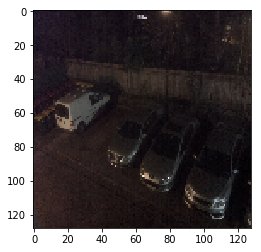

In [22]:
nb_images = sum([len(os.listdir(img_files[0])) for i in range(len(img_files))])
random_image_idx = randint(0, nb_images-1)
print("image",random_image_idx)

def display_example(images, id_img):
    plt.imshow(images[id_img]) 
    print('image dimension:',images[id_img].shape)
    
display_example(X, random_image_idx)